In [1]:
!python run_preds.py -c testing_files\cfgs\json_cfg.json

Загружаю датасет
Датасет загружен2021-04-01 16:27:21.505375: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-01 16:27:29.806069: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-01 16:27:29.807763: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-01 16:27:29.833075: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.4175GHz coreCount: 6 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 104.43GiB/s
2021-04-01 16:27:29.833841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-01 16:27:29.858543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opene

In [2]:
!python check_pred_data.py -c testing_files\cfgs\json_cfg.json

Предикты модели model_epoch-01
Тип данных: tp
Количество изображений: 527
Тип данных: bg2021-04-01 16:34:15.567707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll

Количество изображений: 527
Предикты модели model_epoch-03
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-04
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-05
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-06
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-07
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-08
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-107
Тип 

In [3]:
!python calculate_metrics.py -c testing_files\cfgs\json_cfg.json

    Произвожу расчет порога модели model_epoch-01^
     Загружаю данные...
     Произвожу расчет и оценку...
[527, 0, 527, 0]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-03^
     Загружаю данные...
     Произвожу расчет и оценку...
[217, 310, 1, 526]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-04^
     Загружаю данные...
     Произвожу расчет и оценку...
[449, 78, 11, 516]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-05^
     Загружаю данные...
     Произвожу расчет и оценку...
[446, 81, 9, 518]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-06^
     Загружаю данные...
     Произвожу расчет и оценку...
[439, 88, 2, 525]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-07^
     Загружаю данные...
     Произвожу расчет и оценку...
[490, 37, 6, 521]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-08^
     Загружаю данн

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import utils

In [3]:
df = pd.read_csv('testing_files\\final_64\\history\\model_training_log.csv')

In [4]:
df


,epoch,box_loss,conf_loss,loss,val_box_loss,val_conf_loss,val_loss
0,0,402.097198,0.622681,101.147018,464.441040,0.753276,116.863274
1,1,178.128754,0.340246,44.872440,699.777344,1.680776,176.625214
2,2,150.314072,0.278583,37.857075,682.716858,2.062065,172.741333
3,3,133.187637,0.249434,33.546341,717.844788,2.427521,181.888657
4,4,119.903297,0.225605,30.201433,508.112305,1.660286,128.688370
...,...,...,...,...,...,...,...
2995,2995,1.176083,0.000016,0.294037,2.268351,0.001310,0.568398
2996,2996,1.210068,0.000460,0.302977,2.626471,0.002106,0.658724
2997,2997,1.323164,0.000309,0.331100,1.946750,0.000480,0.487168
2998,2998,1.343639,0.000036,0.335946,2.379865,0.003287,0.598253


In [4]:
acc_json_names = os.listdir('testing_files\\opt_param1\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\opt_param1\\results\\json_roc_auc_data')
result_dir = 'testing_files\\opt_param1\\results'

In [5]:
def get_acc_model_name(json_name):
    return json_name[16:].split('.')[0]

def get_auc_model_name(json_name):
    return json_name[19:].split('.')[0]

def load_metrics(acc_json_names, auc_json_names, result_dir):
    acc_dir = os.path.join(result_dir, 'json_acc_data')
    auc_dir = os.path.join(result_dir, 'json_roc_auc_data')
    num_models = len(acc_json_names)
    metric_data = {}
    for i in range(num_models):
        acc_json_name = acc_json_names[i]
        auc_json_name = auc_json_names[i]
        model_name = int(acc_json_name.split('-')[-1].split('.')[0])
        acc_pth = os.path.join(acc_dir, acc_json_name)
        auc_pth = os.path.join(auc_dir, auc_json_name)
        metric_data[model_name] = {'acc': utils.get_json_data(acc_pth)['accuracy'], 'auc': utils.get_json_data(auc_pth)['auc']}
    return metric_data

def get_acc_auc(metric_data, epochs):
    acc = []
    auc = []
    for epoch in epochs:
        acc.append(metric_data[epoch]['acc'])
        auc.append(metric_data[epoch]['auc'])
    return acc, auc 

In [6]:
metric_data = load_metrics(acc_json_names, auc_json_names, result_dir)

NameError: name 'utils' is not defined

In [8]:
metric_data

{1: {'acc': 0.5, 'auc': 0.5},
 3: {'acc': 0.8055028462998103, 'auc': 0.8055028462998102},
 4: {'acc': 0.8396584440227703, 'auc': 0.8396584440227705},
 5: {'acc': 0.9554079696394687, 'auc': 0.9554079696394686},
 9: {'acc': 0.9554079696394687, 'auc': 0.9554079696394686},
 10: {'acc': 0.9667931688804554, 'auc': 0.9667931688804553},
 11: {'acc': 0.9734345351043643, 'auc': 0.9734345351043643},
 122: {'acc': 0.9943074003795066, 'auc': 0.9943074003795067},
 123: {'acc': 0.9962049335863378, 'auc': 0.9962049335863377},
 126: {'acc': 0.9952561669829222, 'auc': 0.9952561669829222},
 129: {'acc': 0.9952561669829222, 'auc': 0.9952561669829222},
 13: {'acc': 0.976280834914611, 'auc': 0.976280834914611},
 135: {'acc': 0.9962049335863378, 'auc': 0.9962049335863377},
 137: {'acc': 0.9952561669829222, 'auc': 0.9952561669829222},
 14: {'acc': 0.9772296015180265, 'auc': 0.9772296015180266},
 141: {'acc': 0.9962049335863378, 'auc': 0.9962049335863377},
 156: {'acc': 0.9962049335863378, 'auc': 0.99620493358

In [10]:
epochs = list(metric_data.keys())
epochs = sorted(epochs)
acc, auc = get_acc_auc(metric_data, epochs)

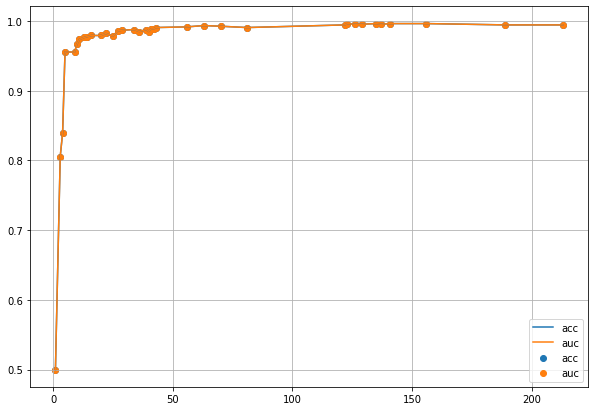

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(epochs[:-1], acc[:-1], label='acc')
plt.scatter(epochs[:-1], acc[:-1], label='acc')
plt.plot(epochs[:-1], auc[:-1], label='auc')
plt.scatter(epochs[:-1], auc[:-1], label='auc')
plt.legend()
plt.grid('on')
plt.show()

In [2]:
human_df = pd.read_csv('testing_files\\tiny_64_1\\csv_conf\\model_epoch-156\\output_model_epoch-156_tp.csv')

In [6]:
human_df[human_df['max_conf'] != 1]

,Unnamed: 0,img_name,max_conf,iou,box
70,70,17_2_10_0.jpg,0,0.0,[]
189,189,7_2_10_0.jpg,0,0.0,[]


In [7]:
human_df[human_df['iou'] < 0.5]

,Unnamed: 0,img_name,max_conf,iou,box
70,70,17_2_10_0.jpg,0,0.000000,[]
94,94,199_1_40_0.jpg,1,0.286315,"[34.053443908691406, 15.389646530151367, 58.14..."
95,95,19_0_30_1.jpg,1,0.417464,"[15.532657623291016, 11.265019416809082, 33.59..."
97,97,200_0_30_1.jpg,1,0.477431,"[6.914377212524414, 2.3486673831939697, 51.580..."
124,124,226_5_40_0.jpg,1,0.253859,"[40.67264175415039, 20.290563583374023, 61.567..."
188,188,7_1_40_0.jpg,1,0.190725,"[-3.0627028942108154, 7.8891377449035645, 13.7..."
189,189,7_2_10_0.jpg,0,0.000000,[]
195,195,83_0_10_0.jpg,1,0.493361,"[24.533370971679688, 4.071995258331299, 62.150..."
207,207,a0_1_30_1.jpg,1,0.253392,"[35.93610763549805, 9.014581680297852, 53.0300..."
209,209,a1_1_40_2.jpg,1,0.000000,"[3.276780128479004, 1.2773716449737549, 20.087..."


In [ ]:
acc_json_names = os.listdir('testing_files\\tiny_64_1\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\tiny_64_1\\results\\json_roc_auc_data')
result_dir = 'testing_files\\tiny_64_1\\results'

In [ ]:
metric_data2 = load_metrics(acc_json_names, auc_json_names, result_dir)